In [32]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, shapiro, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scripts.utils import rank_biserial

In [33]:
# File paths
path_interactions_1b5h = "../../csv_data/interactions/nonsem_interactions_1b5h.csv"
path_interactions_3b3h = "../../csv_data/interactions/nonsem_interactions_3b3h.csv"

# Load the CSV files into DataFrames
df_interactions_1b5h = pd.read_csv(path_interactions_1b5h)
df_interactions_3b3h = pd.read_csv(path_interactions_3b3h)

### Difference in copying behavior: 1B5H vs. 3B3H (All)

In [34]:
# Extract the 'items_copied' columns
items_copied_1b5h = df_interactions_1b5h['items_copied']
items_copied_3b3h = df_interactions_3b3h['items_copied']

In [35]:
# Check normality assumption
shapiro_1b5h = shapiro(items_copied_1b5h)
shapiro_3b3h = shapiro(items_copied_3b3h)

print(f"P-value of Shapiro-Wilk test for 1b5h: {shapiro_1b5h[1]}")
print(f"P-value of Shapiro-Wilk test for 3b3h: {shapiro_3b3h[1]}")

P-value of Shapiro-Wilk test for 1b5h: 8.630283932814356e-13
P-value of Shapiro-Wilk test for 3b3h: 6.84610289349245e-09


In [36]:
# If normality is violated in either group, use Mann-Whitney U test
if shapiro_1b5h.pvalue < 0.05 or shapiro_3b3h.pvalue < 0.05:   
    mannwhitney_test = mannwhitneyu(items_copied_3b3h, items_copied_1b5h, alternative='greater')
    print(f"Mann-Whitney U test: {mannwhitney_test}")

Mann-Whitney U test: MannwhitneyuResult(statistic=6234.5, pvalue=0.021647167140819483)


In [37]:
# Calculate Effect Size (r) for Mann-Whitney U test
effect_size_copying_behaviour = rank_biserial(items_copied_3b3h, items_copied_1b5h)
print(f"Effect size (r) for copying behaviour: {effect_size_copying_behaviour}")

Effect size (r) for copying behaviour: 0.1528291420118344


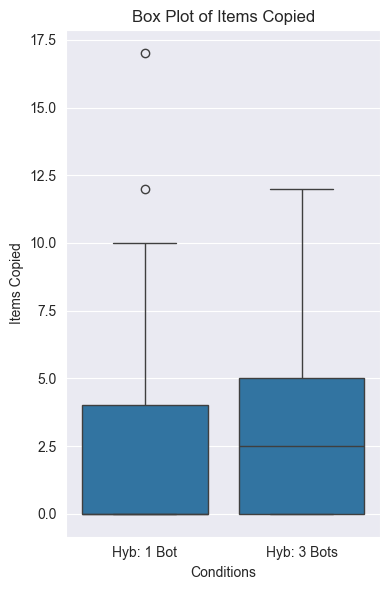

In [38]:
# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'Condition': ['Hyb: 1 Bot'] * len(items_copied_1b5h) + ['Hyb: 3 Bots'] * len(items_copied_3b3h),
    'Items_Copied': list(items_copied_1b5h) + list(items_copied_3b3h)
})

# Plotting box plot
plt.figure(figsize=(4, 6))
sns.boxplot(x='Condition', y='Items_Copied', data=df_plot)
plt.title('Box Plot of Items Copied')
plt.xlabel('Conditions')
plt.ylabel('Items Copied')
plt.tight_layout()

# Save the plot as a PDF file
output_path = "../../plots/interactions/box_plot_items_copied.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')

# Display the plot
plt.show()

### Relationship between copying behavior and score

In [39]:
# Combine the two DataFrames
df_combined = pd.concat([df_interactions_1b5h, df_interactions_3b3h])

# Apply log transformation to the scores to handle skewness and reduce the impact of outliers
df_combined['log_score'] = np.log1p(df_combined['score'])

# Check normality of 'log_score'
shapiro_log_score = shapiro(df_combined['log_score'])
print(f"Shapiro-Wilk test for log_score: {shapiro_log_score}")

if shapiro_log_score[1] < 0.05:
    print("The log-transformed score is not normally distributed. Apply Spearman correlation.")
    # Calculate Spearman correlation on log-transformed score
    spearman_corr_log, spearman_p_value_log = spearmanr(df_combined['items_copied'], df_combined['log_score'])
    print(f"Spearman correlation (log score): {spearman_corr_log} (p-value: {spearman_p_value_log})")
else:
    print("The log-transformed score is normally distributed. Apply Pearson correlation.")
    # Calculate Pearson correlation on log-transformed score
    pearson_corr_log, pearson_p_value_log = pearsonr(df_combined['items_copied'], df_combined['log_score'])
    print(f"Pearson correlation (log score): {pearson_corr_log} (p-value: {pearson_p_value_log})")

Shapiro-Wilk test for log_score: ShapiroResult(statistic=0.8746466290961288, pvalue=4.235319145580971e-12)
The log-transformed score is not normally distributed. Apply Spearman correlation.
Spearman correlation (log score): 0.7964362563293801 (p-value: 6.961351752683724e-47)


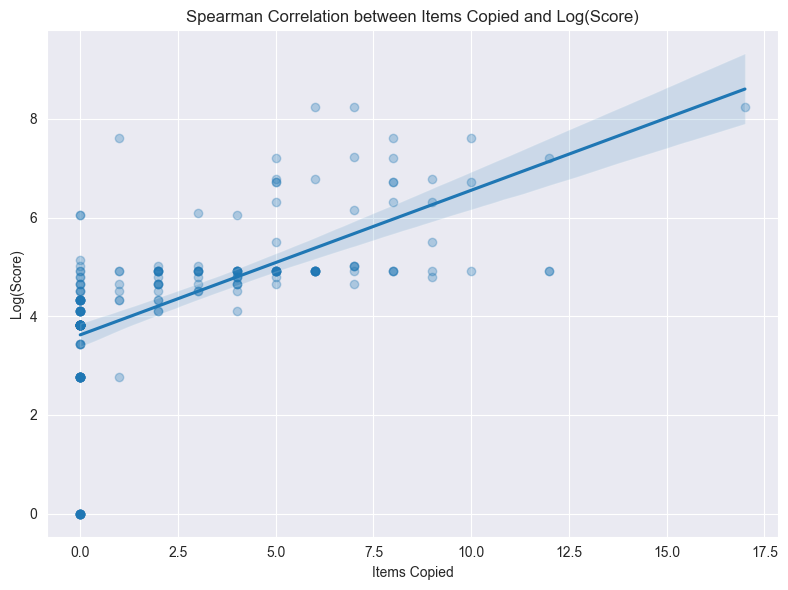

In [40]:
# Visualize the relationship with a scatter plot and regression line (log-transformed score)
plt.figure(figsize=(8, 6))
sns.regplot(x='items_copied', y='log_score', data=df_combined, scatter_kws={'alpha':0.3})
plt.title('Spearman Correlation between Items Copied and Log(Score)')
plt.xlabel('Items Copied')
plt.ylabel('Log(Score)')
plt.tight_layout()

# Save the plot as a PDF file
output_path = "../../plots/interactions/scatter_plot_items_copied_score.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')

# Display the plot
plt.show()

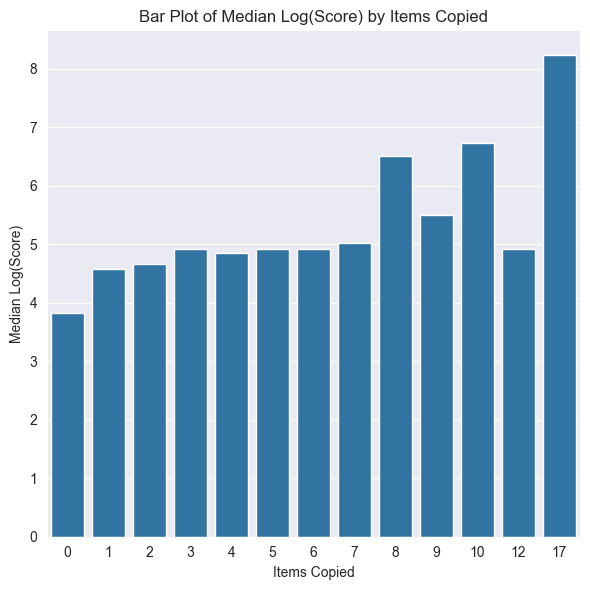

In [41]:
# Aggregate visualization by median
df_aggregated = df_combined.groupby('items_copied').agg({'log_score': 'median'}).reset_index()
plt.figure(figsize=(6, 6))
sns.barplot(x='items_copied', y='log_score', data=df_aggregated)
plt.title('Bar Plot of Median Log(Score) by Items Copied')
plt.xlabel('Items Copied')
plt.ylabel('Median Log(Score)')
plt.tight_layout()

# Save the plot as a PDF file
output_path = "../../plots/interactions/bar_plot_items_copied_score.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')

# Display the plot
plt.show()

### Relationship between copying behavior and items found


In [42]:
# Check normality
shapiro_items_found = shapiro(df_combined['total_items_found'])
print(f"Shapiro-Wilk test for total_items_found: {shapiro_items_found}")

if shapiro_items_found[1] < 0.05:
    print("The total_items_found is not normally distributed. Apply Spearman correlation.")
    # Calculate Spearman correlation on score
    spearman_corr_items, spearman_p_value_items = spearmanr(df_combined['items_copied'], df_combined['total_items_found'])
    print(f"Spearman correlation (score): {spearman_corr_items} (p-value: {spearman_p_value_items})")
else:
    print("The total_items_found is normally distributed. Apply Pearson correlation.")
    # Calculate Pearson correlation on score
    pearson_corr_items, pearson_p_value_items = pearsonr(df_combined['items_copied'], df_combined['total_items_found'])
    print(f"Pearson correlation (score): {pearson_corr_items} (p-value: {pearson_p_value_items})")

Shapiro-Wilk test for total_items_found: ShapiroResult(statistic=0.9506607676928268, pvalue=1.4291395482652993e-06)
The total_items_found is not normally distributed. Apply Spearman correlation.
Spearman correlation (score): 0.8214912817036228 (p-value: 3.747905010653624e-52)


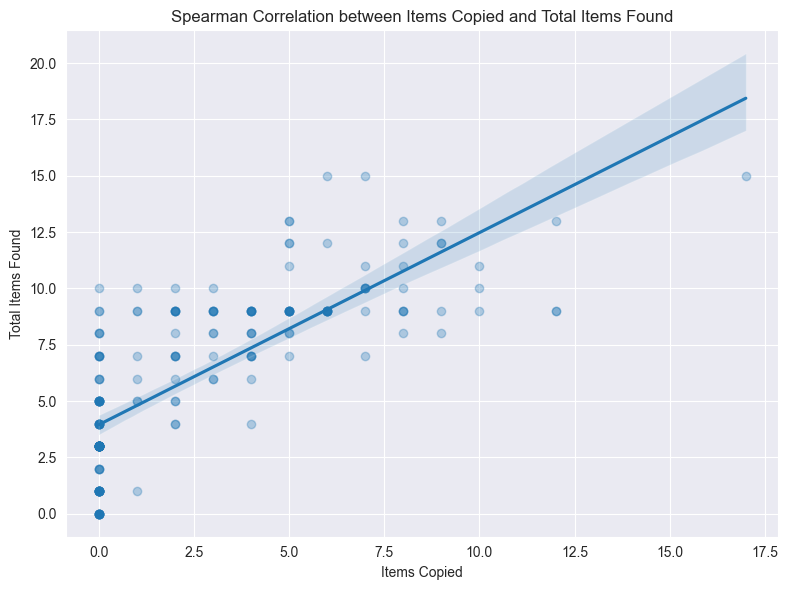

In [43]:
# Visualize the relationship with a scatter plot and regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='items_copied', y='total_items_found', data=df_combined, scatter_kws={'alpha':0.3})
plt.title('Spearman Correlation between Items Copied and Total Items Found')
plt.xlabel('Items Copied')
plt.ylabel('Total Items Found')
plt.tight_layout()

# Save the plot as a PDF file
output_path = "../../plots/interactions/scatter_plot_items_copied_total_items_found.pdf"
plt.savefig(output_path, format='pdf', bbox_inches='tight')

# Display the plot
plt.show()